# Given

Let's suppose you have following training dataset:
- The input variable `X` is a numpy array which has 6 training examples, each with two features
- The output variable `y` is also a numpy array with 6 examples, and `y` is either `0` or `1`

# Find

Build the decision boundary and classify points in 2 groups

# Solution

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])

m = x.shape[0]

### Define model

Sigmoid function:
$$g(z) = \frac{1}{1+e^{-z}}$$

A Logistic Regression model applies Sigmoid function to Linear Regerssion model:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$

Resulted Logistics Regression model:
$$g(f_{\mathbf{w},b}(x)) = gf_{\mathbf{w},b}(x) = \frac{1}{1+e^{-(w \cdot x + b)}}$$

In [3]:
sigmoid = lambda x, w, b : 1 / (1 + np.exp(-1 * (np.dot(x, w) + b) ) )

### Define loss and cost

Loss on a single data point is defined as distance from predicted to actual:

$$
  Loss(f_{\mathbf{w},b}(\mathbf{x}_i), y_i) = \begin{cases}
    - \log\left(f_{\mathbf{w},b}\left( \mathbf{x}_i \right) \right) & \text{if $y_i=1$}\\
    - \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}_i \right) \right) & \text{if $y_i=0$}
  \end{cases}
$$

Therefore, the loss and cost are:

$$Loss_i(w,b) = -[y_i \cdot log(gf_{\mathbf{w},b}(x_i))+(1-y_i) \cdot log(1-gf_{\mathbf{w},b}(x_i))]$$
$$J(w,b) = \frac{1}{m}\sum\limits^{m} Loss_i(w,b)^2$$

* see math in here - https://medium.com/analytics-vidhya/derivative-of-log-loss-function-for-logistic-regression-9b832f025c2d

In [4]:
def CalculateCost(w, b):
    
    upper_half = - np.log(sigmoid(x, w, b))
    lower_half = - np.log(1 - sigmoid(x, w, b))

    loss = sigmoid(x, w, b) - y

    cost = np.dot(y, upper_half) + np.dot((1 - y),lower_half)
    cost = np.sum(cost) / m

    return loss, cost

### Calculate gradient vectors

Derivatives are the same (see link above), so we calculate Gradients as in Linear Regression case:
$$\frac{\partial J(\mathbf{w},b)}{\partial w}  = \frac{1}{m} \sum\limits^{m} Loss_{i}(w,b) \cdot x_{i}$$
$$\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits^{m} Loss_{i}(w,b)$$

In [5]:
def CalculateGradient(w, b):
    
    loss, cost = CalculateCost(w, b)

    dJ_dw = np.dot(loss, x) / m
    dJ_db = np.sum(loss) / m

    return dJ_dw, dJ_db, cost

### GD

In [6]:
def GD(alpha = 0.1, iterations = 10000):

    # initial w & b

    w = np.zeros_like(x[0])
    b = 0

    #GD
    log = []

    i = 0

    for i in range(iterations):

        dJ_dw, dJ_db, cost = CalculateGradient(w, b)

        log.append([i, w, b, cost, dJ_dw, dJ_db])

        w -= alpha * dJ_dw
        b -= alpha * dJ_db

        i += 1

    log = np.array(log, dtype="object")

    return w, b, log

### Answer

In [7]:
w, b, log = GD()
w, b

(array([5.28123029, 5.07815608]), -14.222409982019839)

### Plot the data and decision boundary

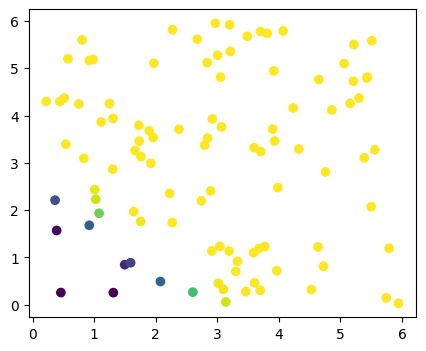

In [8]:
x_plot = np.random.uniform(0, 6, size=(100,2))

fix, ax = plt.subplots(1,1,figsize=(5,4))
ox = np.arange(0,x_plot.shape[0])
ax.scatter(x_plot[:,0], x_plot[:,1], c=sigmoid(x_plot,w,b))

### Plot model function

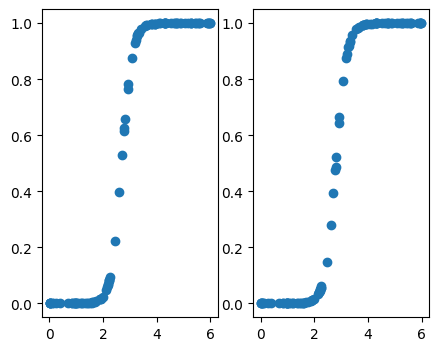

In [9]:
x_plot = np.random.uniform(0, 6, size=(100,))

fix, ax = plt.subplots(1,2,figsize=(5,4))
ox = np.arange(0,x_plot.shape[0])
# Plot sigmoid function with first set of weights
ax[0].scatter(x_plot, sigmoid(x_plot,w[0],b))
# Plot sigmoid function with second set of weights
ax[1].scatter(x_plot, sigmoid(x_plot,w[1],b))